In [7]:
import sys
from PIL import Image
sys.modules['Image'] = Image


In [8]:
from PIL import Image
print(Image.__file__)

c:\Users\hwang\anaconda3\envs\aaaaiiiii\lib\site-packages\PIL\Image.py


In [9]:
import PIL.Image
print(Image.__file__)

c:\Users\hwang\anaconda3\envs\aaaaiiiii\lib\site-packages\PIL\Image.py


In [13]:
# conda activate electronic_capstone
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
save_model = "test"
# train_dir      = 'C:/Users/hwang/code/image_crolling/data/train/'
# validation_dir = 'C:/Users/hwang/code/image_crolling/data/validation/'
train_dir      = "image_datas/train"
validation_dir = "image_datas/valid"

# 사이즈
input_size = 256
#배치 사이즈
Batch_size =20


Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


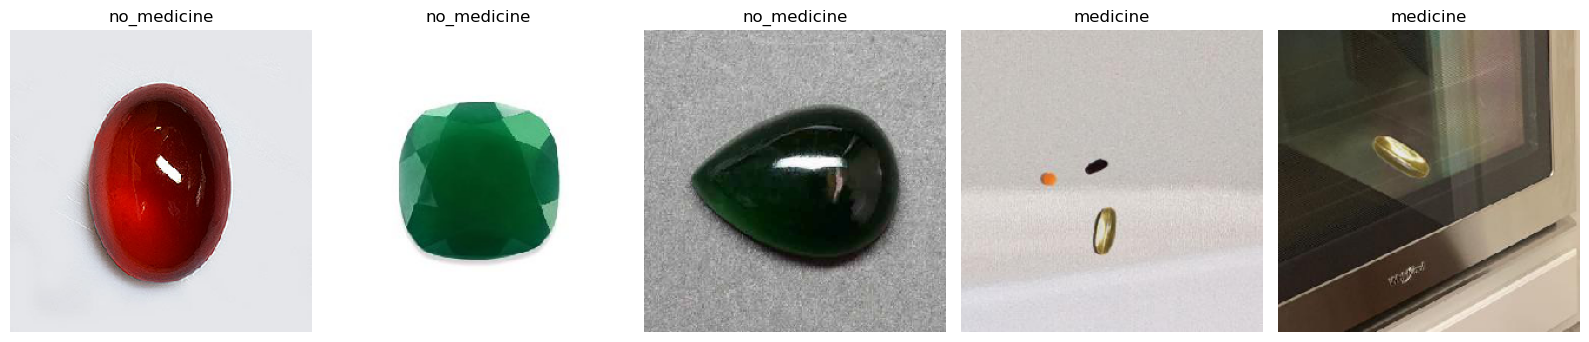

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [15]:
#전처리
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)



target_size_edit = (input_size,input_size)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    classes=['medicine', 'not_medicine'],
                                                    batch_size = Batch_size,
                                                    target_size = target_size_edit,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              classes=['medicine', 'not_medicine'],
                                                              batch_size = Batch_size,
                                                              target_size = target_size_edit,
                                                              class_mode = 'categorical')
#####################################
class_labels = ["medicine","no_medicine"]
batch = next(train_generator)
images, labels = batch[0], batch[1] # 0번 이미지데이터 1번 레이블
print(labels[:10])
plt.figure(figsize=(16,8))
for i in range(5) :
    ax = plt.subplot(1,5,i+1)
    plt.imshow(images[i])
    plt.title(class_labels[sum(np.where(labels[i] == 1))[0]])
    plt.axis("off")
plt.tight_layout()
plt.show()
#########################################
train_datagen = ImageDataGenerator()
validation_datagen=ImageDataGenerator()
target_size_edit = (input_size,input_size)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    classes=['medicine', 'not_medicine'],
                                                    batch_size = Batch_size,
                                                    target_size = target_size_edit,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              classes=['medicine', 'not_medicine'],
                                                              batch_size = Batch_size,
                                                              target_size = target_size_edit,
                                                              class_mode = 'categorical')


In [16]:
validation_generator.class_indices

{'medicine': 0, 'not_medicine': 1}

In [17]:
## 이 아래 코드를 사용하려면 rescale=1/255, 부분을 주석처리 해야함(efficient는 자동으로 해줌)
#모델 인코딩
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers
def build_model_Efficient(NUM_CLASSES):
    inputs = layers.Input(shape=(input_size, input_size, 3))
    # x = img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["acc"]
    )
    return model

model = build_model_Efficient(NUM_CLASSES = 2)

In [18]:
# steps_per_epoch = 훈련 샘플 수 / 배치 사이즈
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=50,
                    validation_steps = len(validation_generator),
                    verbose=1)

Epoch 1/50
200/200 [==============================] - 215s 1s/step - loss: 0.1296 - acc: 0.9797 - val_loss: 0.0490 - val_acc: 0.9855
Epoch 2/50
200/200 [==============================] - 186s 929ms/step - loss: 0.0884 - acc: 0.9895 - val_loss: 0.0341 - val_acc: 0.9955
Epoch 3/50
200/200 [==============================] - 171s 855ms/step - loss: 0.1127 - acc: 0.9898 - val_loss: 0.0618 - val_acc: 0.9925
Epoch 4/50
200/200 [==============================] - 168s 842ms/step - loss: 0.0225 - acc: 0.9958 - val_loss: 0.0824 - val_acc: 0.9940
Epoch 5/50
200/200 [==============================] - 189s 948ms/step - loss: 0.1002 - acc: 0.9920 - val_loss: 0.1947 - val_acc: 0.9910
Epoch 6/50
200/200 [==============================] - 199s 995ms/step - loss: 0.1580 - acc: 0.9902 - val_loss: 0.1486 - val_acc: 0.9910
Epoch 7/50
200/200 [==============================] - 175s 874ms/step - loss: 0.0392 - acc: 0.9962 - val_loss: 0.1848 - val_acc: 0.9895
Epoch 8/50
200/200 [==============================]

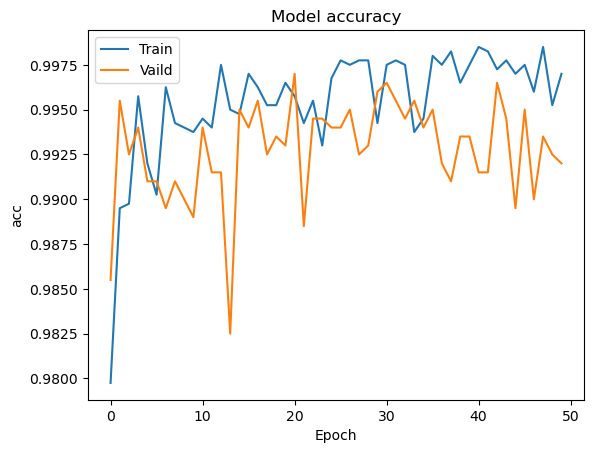

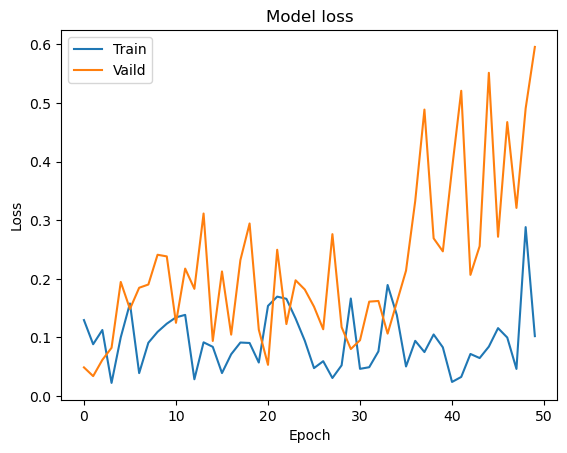

In [19]:
# 훈련 과정 시각화 (정확도)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Vaild'], loc='upper left')
plt.show()

# 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Vaild'], loc='upper left')
plt.show()

In [20]:
model.save(f'{save_model}_model.h5')

In [21]:
from keras.models import load_model
a = load_model(f'{save_model}_model.h5')
test_hist = a.evaluate(validation_generator)

100/100 [==============================] - 60s 576ms/step - loss: 0.5955 - acc: 0.9920
